In [1]:
from statsmodels.stats.multicomp import tukeyhsd
# tukeyhsd()

In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# pairwise_tukeyhsd()

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
from sklearn.datasets import make_moons

In [5]:
X, Y = make_moons(n_samples = 200, noise = 0.2, random_state = 123)
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                      pd.Series(Y)], axis = 1)
df_moon.head(2)

x         y  0
0 -0.077962  1.062934  0
1  0.202304 -0.067724  1

In [6]:
df_moon.plot.scatter(x = "x", y = "y", c = 0, # <- 변수명이 0
                      colormap = "viridis")

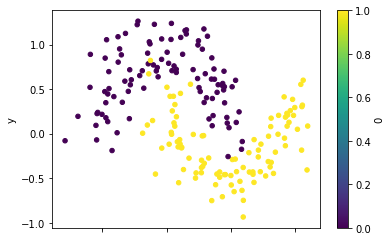

In [7]:
X, Y = make_moons(n_samples = 200, noise = 0.2, random_state = 123)
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                      pd.Series(Y)], axis = 1)
df_moon.plot.scatter(x = "x", y = "y", c = 0, 
                      colormap = "viridis")

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.3) # test 30%
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = X_tr, y = Y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_pred = model.predict(X_te)
accuracy_score(y_true = Y_te, y_pred = y_pred)

0.9666666666666667

In [11]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [12]:
dia_train, dia_test = train_test_split(dia, test_size = 0.3, random_state = 123)
print(len(dia))
print(len(dia_train))
print(len(dia_test))

53940
37758
16182


In [13]:
from sklearn.cluster import KMeans

In [14]:
df = pd.read_excel("iris_xlsx.xlsx")
X = df.loc[:, :"Petal.Width"]
X.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

In [15]:
df.loc[:2, :]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [17]:
df.iloc[:2, :]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [18]:
# kmeans = KMeans(n_clusters = 3)
# kmeans = kmeans.fit(X)

# kmeans = KMeans(n_clusters = 3)
# kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans = KMeans(n_clusters = 3).fit(X)

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_, 
                          columns = X.columns)
centroids

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      5.006000     3.428000      1.462000     0.246000
1      5.901613     2.748387      4.393548     1.433871
2      6.850000     3.073684      5.742105     2.071053

In [ ]:
# df_x, df_y

In [26]:
X["cluster"] = kmeans.labels_ # !!!!!! 중요
X.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  cluster
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0

In [ ]:
X["cluster"].value_counts()

In [27]:
X.groupby("cluster").mean()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
cluster                                                      
0            5.006000     3.428000      1.462000     0.246000
1            5.901613     2.748387      4.393548     1.433871
2            6.850000     3.073684      5.742105     2.071053

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

In [32]:
X = df.drop("Species", axis = 1) # df객체에서 "Species" 변수를 제외.
linked = linkage(X, method = "ward")

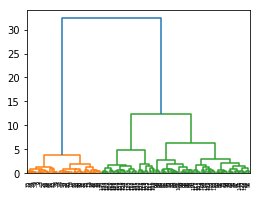

In [33]:
plt.figure(figsize = (4, 3))
dendrogram(linked)
plt.show()

In [36]:
cluster = AgglomerativeClustering(n_clusters = 3, 
                                   affinity = "euclidean", 
                                   linkage = "ward")
cluster.fit_predict(X)[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
pd.crosstab(cluster.fit_predict(X), df["Species"])

Species  setosa  versicolor  virginica
row_0                                 
0             0          49         15
1            50           0          0
2             0           1         35

In [39]:
from sklearn.cluster import AgglomerativeClustering
df = pd.read_excel("iris_xlsx.xlsx")
X = df.drop("Species", axis = 1) 
cluster = AgglomerativeClustering(n_clusters = 3, 
                                   affinity = "euclidean", 
                                   linkage = "ward")
pred_cluster = cluster.fit_predict(X)
pd.crosstab(df["Species"], pred_cluster)

col_0        0   1   2
Species               
setosa       0  50   0
versicolor  49   0   1
virginica   15   0  35

In [40]:
from statsmodels.formula.api import ols

In [43]:
df = pd.read_csv("linear_regression_01.csv")
model = ols("y ~ x", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 26 Nov 2020   Prob (F-statistic):             0.0848
Time:                        13:06:54   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [46]:
dia["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [45]:
dia_dum = pd.get_dummies(dia, columns = ["cut"], drop_first = True)
dia_dum.head(2)

carat color clarity  depth  table  price     x     y     z  cut_Good  \
0   0.23     E     SI2   61.5   55.0    326  3.95  3.98  2.43         0   
1   0.21     E     SI1   59.8   61.0    326  3.89  3.84  2.31         0   

   cut_Ideal  cut_Premium  cut_Very Good  
0          1            0              0  
1          0            1              0

In [49]:
dia_cut_unique = dia["cut"].unique()
dia_cut_unique.sort()
dia_cut_unique

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [50]:
bike = pd.read_csv("bike.csv")
bike.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [51]:
from statsmodels.api import Logit
import numpy as np

In [ ]:
df = pd.read_csv("logistic_regression_01.csv")
df.head(2)

In [ ]:
df_dum = pd.get_dummies(df, columns = ["rank"], drop_first = True)
df_dum.head(2)

In [54]:
model = Logit(endog = df_dum["admit"],
               exog = df_dum.drop("admit", axis = 1)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.589306
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                 0.05707
Time:                        16:16:46   Log-Likelihood:                -235.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 9.732e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.329      0.184      -0.001       0.003
gpa           -0.1336      0.194     -0.687      0.492      -0.515       0.248
rank_2        -0.9663      0.300     -3.216      0.001      -1.555      -0.377
rank_3        -1.5451      0.332     -4.648      0.000      -2.197      -0.894
rank_4        -1.8776      0.402     -4.676      0.000      -2.665      -1.091
==============================================================================
"""

In [56]:
round(np.exp(-0.9663), 3) # rank_2의 Odds Ratio

0.38

In [ ]:
pred_prob = model.predict(df_dum.drop("admit", axis = 1))
pred_prob[:3]

In [ ]:
pred_class = (pred_prob > 0.5) + 0 # 0.5는 경계값. 조정 가능
pred_class[:3]

In [ ]:
pd.crosstab(df_dum["admit"], pred_class)

In [64]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_true = df_dum["admit"], y_pred = pred_class), 3)

0.695

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [70]:
df = pd.read_csv("classification_data_01.csv")
df.head(2)

Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0

In [71]:
X = df.drop("Class", axis = 1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                      random_state = 123)

In [78]:
clf_1 = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_1 = clf_1.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_pred_1)

0.9963636363636363

In [79]:
clf_2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_pred_2)

0.9563636363636364

In [81]:
y_pred_2[:3]

array([0, 0, 0], dtype=int64)

In [83]:
pd.crosstab(y_test, y_pred_2)

col_0    0    1
Class          
0      142    5
1        7  121

In [87]:
y_pred_2_prob = clf_2.predict_proba(X_test)
y_pred_2_prob[:10] # 두 번째 column이 1이될 확률

array([[1.        , 0.        ],
       [0.74820144, 0.25179856],
       [0.99262899, 0.00737101],
       [0.99262899, 0.00737101],
       [0.04021448, 0.95978552],
       [0.04021448, 0.95978552],
       [0.30434783, 0.69565217],
       [0.04021448, 0.95978552],
       [0.04021448, 0.95978552],
       [0.99262899, 0.00737101]])

In [94]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2_prob[:, 1])
auc(fpr, tpr)

0.9859428146258503

In [ ]:
reg_1 = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_1 = reg_1.predict(X_test)